In [1]:
!pip install numpy pandas matplotlib scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

print("Libraries loaded successfully")


Libraries loaded successfully


In [3]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [9]:
import pandas as pd

data = pd.read_csv("data.csv", encoding="latin1")
print(data.head())


  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3       

/tmp/ipython-input-1567333779.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv", encoding="latin1")


In [11]:
print(data.columns)


Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


In [12]:
import numpy as np

x = data["no2"].dropna().values
print(len(x))
print(x[:5])


419509
[17.4  7.  28.5 14.7  7.5]


In [13]:
r = 102303957

a_r = 0.05 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)


a_r = 0.0
b_r = 0.8999999999999999


In [14]:
z = x + a_r * np.sin(b_r * x)

print("First 5 z values:")
print(z[:5])


First 5 z values:
[17.4  7.  28.5 14.7  7.5]


In [15]:
mu = np.mean(z)
sigma = np.std(z)

lambda_ = 1 / (2 * sigma**2)
c = np.sqrt(lambda_ / np.pi)

print("mu =", mu)
print("lambda =", lambda_)
print("c =", c)


mu = 25.809622897811263
lambda = 0.0014604365254890011
c = 0.021560876239314918


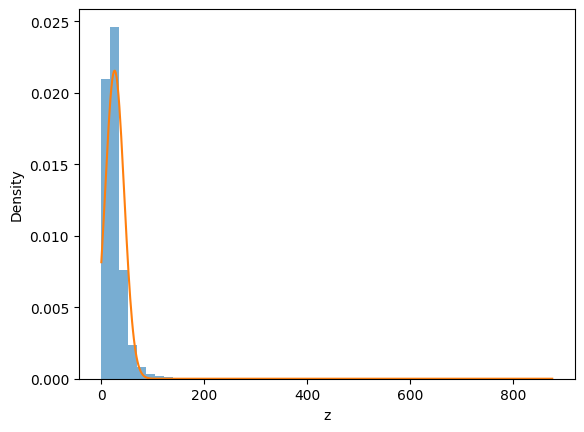

In [16]:
import matplotlib.pyplot as plt

z_sorted = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lambda_ * (z_sorted - mu)**2)

plt.hist(z, bins=50, density=True, alpha=0.6)
plt.plot(z_sorted, pdf)
plt.xlabel("z")
plt.ylabel("Density")
plt.show()
